In [1]:
### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application

##Min-Max Scaling: Definition and Usage
# Min-Max Scaling is a data preprocessing technique used to normalize or scale data features within a specific range, typically between 0 and 1. The primary goal of Min-Max Scaling is to transform the features of the data so that they all have the same scale, which helps improve the performance and accuracy of machine learning models.

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {'Feature': [20, 40, 60, 80, 100]}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df['Scaled_Feature'] = scaler.fit_transform(df[['Feature']])

print("\nData after Min-Max Scaling:")
print(df)



Original Data:
   Feature
0       20
1       40
2       60
3       80
4      100

Data after Min-Max Scaling:
   Feature  Scaled_Feature
0       20            0.00
1       40            0.25
2       60            0.50
3       80            0.75
4      100            1.00


In [2]:
#### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.
# The Unit Vector technique, also known as Normalization or L2 normalization, is a feature scaling method that transforms a vector (or feature) to have a unit norm. In other words, it scales the feature vector so that its magnitude (or length) becomes 1. This technique is commonly used when you need to maintain the direction of the vector but want to control for differences in magnitude.


In [4]:
#### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.


###Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a dataset with many features (possibly correlated) into a new set of uncorrelated features called principal components. These components are ordered such that the first few retain most of the variation present in the original dataset, thereby reducing the dimensionality while preserving as much information as possible.


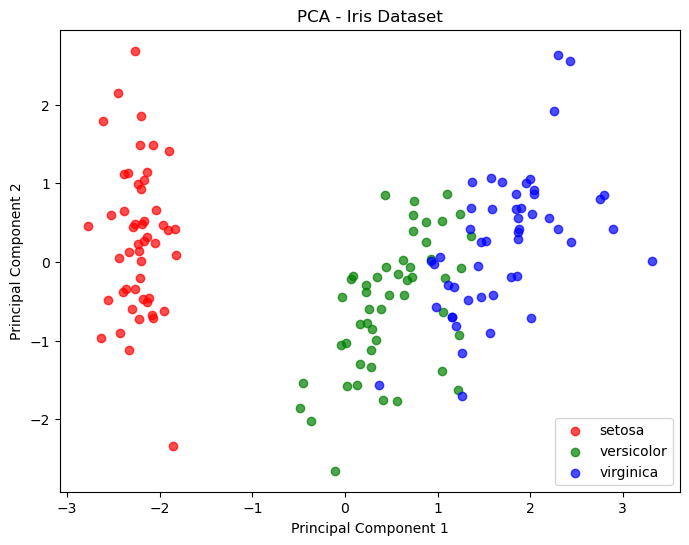

In [1]:
#### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

#Feature extraction is the process of transforming raw data into a set of features that can be used for analysis or modeling. The goal is to extract the most important and informative aspects of the data. Principal Component Analysis (PCA) is a powerful technique for feature extraction because it identifies and ranks the directions (principal components) in which the data varies the most. These principal components are linear combinations of the original features, and they capture the most significant patterns in the data.

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first few rows of the dataset
df.head()

from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target labels to the DataFrame
df_pca['target'] = data.target

# Display the first few rows of the PCA results
df_pca.head()

# Plot the principal components
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, color in zip([0, 1, 2], colors):
    plt.scatter(df_pca.loc[df_pca['target'] == i, 'PC1'],
                df_pca.loc[df_pca['target'] == i, 'PC2'],
                color=color, alpha=0.7, label=data.target_names[i])
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.show()


In [7]:
##### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

#Using Min-Max Scaling for Preprocessing Data in a Recommendation System
#In a recommendation system, it's essential to preprocess the data so that all features contribute equally to the model. Min-Max Scaling is a common technique used to normalize the features to a fixed range, usually between 0 and 1. This ensures that features like price, rating, and delivery time are on the same scale, making it easier for the model to learn from the data.
# step 1
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example dataset with features: price, rating, and delivery time
data = {
    'price': [10, 15, 8, 12, 20],
    'rating': [4.2, 3.8, 4.5, 4.0, 4.9],
    'delivery_time': [30, 45, 20, 35, 25]
}

df = pd.DataFrame(data)

# Display the original dataset
df.head()




,price,rating,delivery_time
0,10,4.2,30
1,15,3.8,45
2,8,4.5,20
3,12,4.0,35
4,20,4.9,25


In [3]:
# step 2 

In [4]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the scaled dataset
df_scaled.head()


,price,rating,delivery_time
0,0.166667,0.363636,0.4
1,0.583333,0.000000,1.0
2,0.000000,0.636364,0.0
3,0.333333,0.181818,0.6
4,1.000000,1.000000,0.2


In [5]:
#step 3 rd 

In [6]:
# Show the range of values for each feature after scaling
print("Original Data:\n", df)
print("\nScaled Data:\n", df_scaled)


Original Data:
    price  rating  delivery_time
0     10     4.2             30
1     15     3.8             45
2      8     4.5             20
3     12     4.0             35
4     20     4.9             25

Scaled Data:
       price    rating  delivery_time
0  0.166667  0.363636            0.4
1  0.583333  0.000000            1.0
2  0.000000  0.636364            0.0
3  0.333333  0.181818            0.6
4  1.000000  1.000000            0.2


In [8]:
#Using PCA for Dimensionality Reduction in Stock Price Prediction
#When working on a project to predict stock prices, you may have a dataset with many features, including company financial data and market trends. These features may be correlated and can lead to redundancy in the data. Principal Component Analysis (PCA) can be used to reduce the dimensionality of the dataset, making the model more efficient and less prone to overfitting.

#Let’s walk through the steps to apply PCA in a Jupyter Notebook.

#Step 1: Import Libraries and Load Data
# First, we'll import the necessary libraries and load a hypothetical dataset.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example dataset with company financial data and market trends
data = {
    'revenue': [200, 220, 240, 260, 280],
    'profit': [20, 22, 24, 26, 28],
    'market_cap': [1000, 1100, 1200, 1300, 1400],
    'interest_rate': [2.5, 2.7, 2.6, 2.8, 2.9],
    'unemployment_rate': [5.1, 5.0, 4.9, 5.0, 5.1],
    'inflation_rate': [1.2, 1.3, 1.4, 1.3, 1.2]
}

df = pd.DataFrame(data)

# Display the original dataset
df.head()



,revenue,profit,market_cap,interest_rate,unemployment_rate,inflation_rate
0,200,20,1000,2.5,5.1,1.2
1,220,22,1100,2.7,5.0,1.3
2,240,24,1200,2.6,4.9,1.4
3,260,26,1300,2.8,5.0,1.3
4,280,28,1400,2.9,5.1,1.2


In [9]:
# Step 2: Standardize the Data
#PCA requires the data to be standardized (mean = 0, variance = 1) because it is sensitive to the scale of the features.

In [10]:
# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Convert the standardized data back to a DataFrame for easier understanding
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

# Display the standardized dataset
df_standardized.head()


,revenue,profit,market_cap,interest_rate,unemployment_rate,inflation_rate
0,-1.414214,-1.414214,-1.414214,-1.414214,1.069045,-1.069045
1,-0.707107,-0.707107,-0.707107,0.000000,-0.267261,0.267261
2,0.000000,0.000000,0.000000,-0.707107,-1.603567,1.603567
3,0.707107,0.707107,0.707107,0.707107,-0.267261,0.267261
4,1.414214,1.414214,1.414214,1.414214,1.069045,-1.069045


In [11]:
#Step 3: Apply PCA for Dimensionality Reduction
#Now, we’ll apply PCA to reduce the dimensionality of the dataset. Let’s say we want to reduce the dataset to 2 principal components.

In [12]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the principal components
df_pca.head()


,PC1,PC2
0,-2.716405,-1.684212
1,-1.095710,0.226862
2,-0.498111,2.298233
3,1.384382,0.467973
4,2.925844,-1.308855


In [13]:
#Step 4: Explain the Variance Captured by Principal Components
#We can check how much variance is captured by each of the principal components.

In [14]:
# Check the variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total Variance Captured by the first 2 components: {np.sum(explained_variance)}")


Explained Variance by each component: [0.64348765 0.33673371]
Total Variance Captured by the first 2 components: 0.9802213610683737


In [15]:
# Step 5: Use the Principal Components for Modeling
#Now that we have reduced the dimensionality of the data, we can use these principal components as features in our stock price prediction model.

#python
#Copy code
# Example of using principal components as features for modeling
# df_pca can now be used in place of the original features for model training